<a href="https://colab.research.google.com/github/Rajnishphe/PH421--Computational-Chemistry/blob/main/5_Bioactivity_prediction_using_Classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Build a SVM based classification QSAR model which predicts activity of compounds from its chemical fingerprints

In [36]:
!pip install rdkit

In [37]:
#Download the file contaning trainig data.
url = "https://raw.githubusercontent.com/Rajnishphe/AIDD-2022/main/ML%20Based%20QSAR/tau_activity.csv"

In [38]:
#Importing the Tau inhibition activity data to build the SVM model
import pandas as pd
act = pd.read_csv(url)

In [39]:
#Take a look at whats inside the input data file
act

,ChEMBL ID,Bioactivities,Smiles,activity
0,CHEMBL1395000,3,COc1cc(NC(=O)CSc2ncc3c(n2)-c2ccc(Cl)cc2N(Cc2cc...,1
1,CHEMBL1789982,4,O=C(C[n+]1nc(-c2n[n+](CC(=O)c3ccccc3)c3n2CCCCC...,1
2,CHEMBL1571924,3,O=C(Oc1cc(OC(=O)c2ccccc2)c2c(c1)OC(c1ccc(OC(=O...,1
3,CHEMBL1593125,3,COc1ccc(NC(=O)Cn2c(=O)n(Cc3ccc4c(c3)OCO4)c(=O)...,1
4,CHEMBL1595105,3,CCC1C[N@@]2CCC1CC2[C@@H](NC(=S)Nc1cc(C(F)(F)F)...,1
...,...,...,...,...
109,CHEMBL359744,1317,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,0
110,CHEMBL28324,1380,CN([C@@H](Cc1ccc(OS(=O)(=O)c2cccc3cnccc23)cc1)...,0
111,CHEMBL163,1444,CC(C)c1nc(CN(C)C(=O)N[C@H](C(=O)N[C@@H](Cc2ccc...,0
112,CHEMBL64391,3282,CCC(C)n1ncn(-c2ccc(N3CCN(c4ccc(OCC5COC(Cn6cncn...,0


In [40]:
#Making a pandas data frame of the smiles structures in the input data

df_smiles = pd.DataFrame(act.Smiles)

In [41]:
#Take a look at the dataframe we created with smiles
df_smiles

,Smiles
0,COc1cc(NC(=O)CSc2ncc3c(n2)-c2ccc(Cl)cc2N(Cc2cc...
1,O=C(C[n+]1nc(-c2n[n+](CC(=O)c3ccccc3)c3n2CCCCC...
2,O=C(Oc1cc(OC(=O)c2ccccc2)c2c(c1)OC(c1ccc(OC(=O...
3,COc1ccc(NC(=O)Cn2c(=O)n(Cc3ccc4c(c3)OCO4)c(=O)...
4,CCC1C[N@@]2CCC1CC2[C@@H](NC(=S)Nc1cc(C(F)(F)F)...
...,...
109,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...
110,CN([C@@H](Cc1ccc(OS(=O)(=O)c2cccc3cnccc23)cc1)...
111,CC(C)c1nc(CN(C)C(=O)N[C@H](C(=O)N[C@@H](Cc2ccc...
112,CCC(C)n1ncn(-c2ccc(N3CCN(c4ccc(OCC5COC(Cn6cncn...


In [42]:
#Now we will converet the smiles format to RDkit readable molecule list of objects

from rdkit import Chem
mol_list= []
for element in act.Smiles:
  mol = Chem.MolFromSmiles(element)
  mol_list.append(mol)

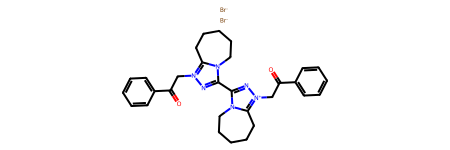

In [43]:
#Take a look at the RDKit object corresponding to the first smiles structre
mol_list[1]

In [44]:
#checking the lenght of the molecule list
len(mol_list)

114

In [45]:
#Now we convert the molecule list to pandas dataframe

df_ml = pd.DataFrame(mol_list ,columns =['object'])

In [46]:
df_ml

,object
0,<rdkit.Chem.rdchem.Mol object at 0x7aa10c53f450>
1,<rdkit.Chem.rdchem.Mol object at 0x7aa10c53f4c0>
2,<rdkit.Chem.rdchem.Mol object at 0x7aa10c53fbc0>
3,<rdkit.Chem.rdchem.Mol object at 0x7aa10c53f0d0>
4,<rdkit.Chem.rdchem.Mol object at 0x7aa10c53ff40>
...,...
109,<rdkit.Chem.rdchem.Mol object at 0x7aa10c18d380>
110,<rdkit.Chem.rdchem.Mol object at 0x7aa10c18d3f0>
111,<rdkit.Chem.rdchem.Mol object at 0x7aa10c18d460>
112,<rdkit.Chem.rdchem.Mol object at 0x7aa10c18d4d0>


In [47]:
#Now we will calculate Morgan / ECFP6 fingerprint for each molecule

import pandas as pd
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
radius=3
nBits=1024

ECFP6 = [AllChem.GetMorganFingerprintAsBitVect(x,radius=radius, nBits=nBits) for x in df_ml['object']]

[03:11:18] DEPRECATION WARNING: please use MorganGenerator
[03:11:18] DEPRECATION WARNING: please use MorganGenerator
[03:11:18] DEPRECATION WARNING: please use MorganGenerator
[03:11:18] DEPRECATION WARNING: please use MorganGenerator
[03:11:18] DEPRECATION WARNING: please use MorganGenerator
[03:11:18] DEPRECATION WARNING: please use MorganGenerator
[03:11:18] DEPRECATION WARNING: please use MorganGenerator
[03:11:18] DEPRECATION WARNING: please use MorganGenerator
[03:11:18] DEPRECATION WARNING: please use MorganGenerator
[03:11:18] DEPRECATION WARNING: please use MorganGenerator
[03:11:18] DEPRECATION WARNING: please use MorganGenerator
[03:11:18] DEPRECATION WARNING: please use MorganGenerator
[03:11:18] DEPRECATION WARNING: please use MorganGenerator
[03:11:18] DEPRECATION WARNING: please use MorganGenerator
[03:11:18] DEPRECATION WARNING: please use MorganGenerator
[03:11:18] DEPRECATION WARNING: please use MorganGenerator
[03:11:18] DEPRECATION WARNING: please use MorganGenerat

In [48]:
len(ECFP6)

114

In [49]:
#Now we assing the molecular fingersprint data as X (Independent variable)

X = ECFP6

In [50]:
X

In [51]:
#Now we assign activity of each molecule from input data as dependendt variable

y = act.activity

In [52]:
y

,activity
0,1
1,1
2,1
3,1
4,1
...,...
109,0
110,0
111,0
112,0


In [53]:
#Now we divide the variables into training and test set , with 20% molecules beign the test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [54]:
#We import support vector machine (SVM) to build a classiification based model called svclassifier

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [55]:
!pip install --upgrade scikit-learn


In [56]:
#Now we predit the activity of test set (y_test) using the svm model using molecular fingerprint data(x_test) as input

y_pred = svclassifier.predict(X_test)

In [57]:
y_pred

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0])

In [58]:
#now we have to check the performace of the model

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[13  0]
 [ 3  7]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.70      0.82        10

    accuracy                           0.87        23
   macro avg       0.91      0.85      0.86        23
weighted avg       0.89      0.87      0.86        23



In [59]:
#using the svm based classification model that we have generated , now we will try to predict the tau inhibition activity of some known AChE inhibitors .
#The smiles structure of known AChE inhibitors can be downloaded from Chembel database .

import pandas as pd
act_ache = pd.read_csv('https://raw.githubusercontent.com/Rajnishphe/AIDD-2022/main/ML%20Based%20QSAR/ache_activity.csv')

In [60]:
#Take a look at whats inside the ache.csv file

act_ache

,Molecule ChEMBL ID,Smiles,bioactivity
0,CHEMBL3754694,COc1cccc2cc(CN(CCCCCCNc3c4c(nc5ccccc35)CCC4)Cc...,0.0003
1,CHEMBL105537,[Br-].[Br-].c1ccc2c[n+](CCCCCCCCCCCC[n+]3ccc4c...,0.0007
2,CHEMBL1200970,CCN(CC)C(C)CN1c2ccccc2Sc2ccccc21.Cl,0.0020
3,CHEMBL3754778,COc1cccc2cc(CN(CCCCCCNc3c4c(nc5ccccc35)CCCCC4)...,0.0020
4,CHEMBL1200970,CCN(CC)C(C)CN1c2ccccc2Sc2ccccc21.Cl,0.0020
...,...,...,...
224,CHEMBL4747185,COc1cccc(CNC2CCN(Cc3ccccc3)C2)c1OC,1.2500
225,CHEMBL3356954,O=C1C(Cl)=C(NCCCNc2c3c(nc4ccccc24)CCCC3)C(=O)c...,1.2600
226,CHEMBL4556097,Nc1cccc(Cl)c1Oc1ccc(CNc2cccc(O)c2)cc1,1.3000
227,CHEMBL3828679,CCCCCCCCCC(C)C1OCc2c[n+](C)c(C)c(OC(=O)N(C)C)c...,1.3000


In [61]:
#Now we will convert the smiles strcuture to RDKit readable molecular list objects

from rdkit import Chem
mol_list_ache= []
for element in act_ache.Smiles:
  mol = Chem.MolFromSmiles(element)
  mol_list_ache.append(mol)

In [62]:
#lenghth of the molecular list
len(mol_list_ache)

229

In [63]:
#Now we will create a dataframe of the RDkit objects

df_ml_ache = pd.DataFrame(mol_list_ache ,columns =['object'])

In [64]:
#Now we will calculate the Morgan/ECFP6 fingerprints of the AChE inhibitor molecules

import pandas as pd
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
radius=3
nBits=1024

ECFP6_ache = [AllChem.GetMorganFingerprintAsBitVect(x,radius=radius, nBits=nBits) for x in df_ml_ache['object']]

[03:11:25] DEPRECATION WARNING: please use MorganGenerator
[03:11:25] DEPRECATION WARNING: please use MorganGenerator
[03:11:25] DEPRECATION WARNING: please use MorganGenerator
[03:11:25] DEPRECATION WARNING: please use MorganGenerator
[03:11:25] DEPRECATION WARNING: please use MorganGenerator
[03:11:25] DEPRECATION WARNING: please use MorganGenerator
[03:11:25] DEPRECATION WARNING: please use MorganGenerator
[03:11:25] DEPRECATION WARNING: please use MorganGenerator
[03:11:25] DEPRECATION WARNING: please use MorganGenerator
[03:11:25] DEPRECATION WARNING: please use MorganGenerator
[03:11:25] DEPRECATION WARNING: please use MorganGenerator
[03:11:25] DEPRECATION WARNING: please use MorganGenerator
[03:11:25] DEPRECATION WARNING: please use MorganGenerator
[03:11:25] DEPRECATION WARNING: please use MorganGenerator
[03:11:25] DEPRECATION WARNING: please use MorganGenerator
[03:11:25] DEPRECATION WARNING: please use MorganGenerator
[03:11:25] DEPRECATION WARNING: please use MorganGenerat

In [65]:
len(ECFP6_ache)

229

In [66]:
#now we assign the ecfp6 fingerprint of AChE inhibitors as the independent variable

x_ache = ECFP6_ache

In [67]:
#Using the SVM classification model that we created for tau inhibition moleucles , we will predict the tau inhibition activity of the AChE inhibitor molecules

y_pred_ache = svclassifier.predict(x_ache)

In [68]:
y_pred_ache

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [69]:
#Convert the results into dataframe

df_pred_ache = pd.DataFrame(y_pred_ache)

In [70]:
#Download the results
df_pred_ache.to_csv('result.csv')